## MÁQUINAS DE SOPORTE VECTORIAL

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR # "Support vector regression"
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.api import abline_plot
from scipy import stats
from statsmodels import graphics
from sklearn import cross_validation 
from sklearn import grid_search

from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

C:\Users\andrea\A\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\andrea\A\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Diametro tronco (cm)",
            "P", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao["Rendimiento"]

### Histograma variable respuesta

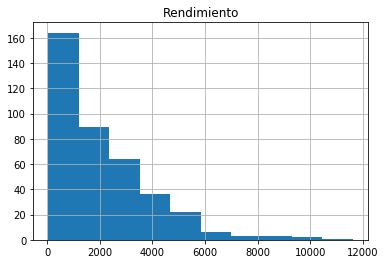

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

In [7]:
#Dividir el conjunto de datos entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
   
# Normalización de los atributos
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Búsqueda de parámetros

In [8]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel lineal

svr = GridSearchCV(SVR(kernel='linear', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [9]:
print("Los mejores parámetros para el modelo SVM con kernel lineal son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel lineal son:


{'C': 10000.0, 'epsilon': 10.0, 'gamma': 0.01}

In [10]:
#Búsqueda de los mejores parámetros para el modelo SVM con kernel rbf

svr = GridSearchCV(SVR(kernel='rbf', gamma=1, epsilon=0.1), cv=5,
                   param_grid = {'C':[1e1, 1e2, 1e3, 1e4],
                             "gamma":np.logspace(-2,2,5),
                             "epsilon": np.logspace(0,1,5)})
svr.fit(X_train_scaled, y_train);

In [11]:
print("Los mejores parámetros para el modelo SVM con kernel rbf son:")
svr.best_params_

Los mejores parámetros para el modelo SVM con kernel rbf son:


{'C': 10000.0, 'epsilon': 10.0, 'gamma': 0.01}

#### Predicción modelo SVM

In [12]:
#Modelo SVM con kernel lineal

svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X_train_scaled, y_train)
y_lin = svr_lin.predict(X_train_scaled)
print(y_lin)

[1103.08428043 1603.33954797 1835.58576542 1393.96020937 2064.72509496
 1386.84979482 2920.71497547 2689.15676173 1307.55956551 1153.45093
 1715.2654359  1723.35113678 2777.70072766  392.71984079 2683.34992771
 2585.62531539 1649.87563145 2537.84627341  959.08667942 2161.29114379
 2288.57687081 1117.43996511 1707.43939486 2171.3634292  1320.27566649
  406.71057678 1309.64270713 2047.93621177 1012.10860989  592.52939646
  597.98282456 2090.785561   1646.43205933 1389.0025171   423.49945997
 1485.81736565  622.16791104 1974.63248179 2926.99927357 1006.88318029
 2545.76325092  767.66002257  440.13393409 1185.59373618 1240.40403276
 2173.85283569  144.24436959 1431.62014999 2109.80419084 2568.9792985
  522.43285021 2506.58919014 1202.75348416 1082.06228984  609.85501886
 2359.40769203 2895.22290998  651.82722683  919.76975235 2915.59614516
  722.40488181 2145.87136371  424.86856307  992.5215795  2842.61001605
 1127.51225052 1636.91731435  363.61806542 1548.49690739  628.90531004
 2329.9971

In [13]:
print('Coeficientes: \n',svr_lin.coef_)

Coeficientes: 
 [[  439.87306816  2267.7076112    904.00337998 -1494.35760507
   1124.02448836   621.29006298  -555.84730059 -1823.33064068
   1760.9283604 ]]


In [14]:
#R^2 predicción GLM con kernel lineal

r2_score(y_train,y_lin)

0.15698625712541936

In [15]:
#Modelo SVM con kernel rbf

svr_rbf = SVR(kernel='rbf', C=1e4, epsilon=1e1, gamma=0.01)
y_rbf = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
print(y_rbf)

[1103.08428043 1603.33954797 1835.58576542 1393.96020937 2064.72509496
 1386.84979482 2920.71497547 2689.15676173 1307.55956551 1153.45093
 1715.2654359  1723.35113678 2777.70072766  392.71984079 2683.34992771
 2585.62531539 1649.87563145 2537.84627341  959.08667942 2161.29114379
 2288.57687081 1117.43996511 1707.43939486 2171.3634292  1320.27566649
  406.71057678 1309.64270713 2047.93621177 1012.10860989  592.52939646
  597.98282456 2090.785561   1646.43205933 1389.0025171   423.49945997
 1485.81736565  622.16791104 1974.63248179 2926.99927357 1006.88318029
 2545.76325092  767.66002257  440.13393409 1185.59373618 1240.40403276
 2173.85283569  144.24436959 1431.62014999 2109.80419084 2568.9792985
  522.43285021 2506.58919014 1202.75348416 1082.06228984  609.85501886
 2359.40769203 2895.22290998  651.82722683  919.76975235 2915.59614516
  722.40488181 2145.87136371  424.86856307  992.5215795  2842.61001605
 1127.51225052 1636.91731435  363.61806542 1548.49690739  628.90531004
 2329.9971

In [16]:
#R^2 predicción GLM con kernel rbf

r2_score(y_train,y_lin)

0.15698625712541936

In [17]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1e4,1e6, 1e3]} 
svr = svm.SVR () 
reg = grid_search.GridSearchCV(svr, parameters) 
print(reg.fit(X_train_scaled, y_train)) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10000.0, 1000000.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [18]:
reg.best_params_

{'C': 1000000.0, 'kernel': 'linear'}

### Cross Validation

In [19]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
     
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    #Escalando particiòn de datos
    scaler2= preprocessing.StandardScaler().fit(x2_train)
    X2_train_scaled=scaler.transform(x2_train)
    X2_test_scaled=scaler.transform(x2_test)
 
       
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X2_train_scaled, y2_train)
    y_lin = svr_lin.predict(X2_test_scaled)
    
    R_2.append(r2_score(y2_test,y_lin))
    RMSE.append(np.linalg.norm((y2_test-y_lin),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,y_lin))
 
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.0989
RMSE: 1727.7491
MAE: 921.0856


### Hold Out Validation

In [20]:
R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(100):
    x3_train,x3_test,y3_train,y3_test=train_test_split(x,y,test_size=0.2) #Hacer partición de datos en entrenamiento y prueba

    #Escalando particiòn de datos
    scaler3= preprocessing.StandardScaler().fit(x3_train)
    X3_train_scaled=scaler.transform(x3_train)
    X3_test_scaled=scaler.transform(x3_test)
    
    # Ajuste de los modelos
    svr_lin = SVR(kernel='linear', C=1e4, epsilon=1e1, gamma=0.01).fit(X3_train_scaled, y3_train)
    y_lin = svr_lin.predict(X3_test_scaled)
    
    r_2=r2_score(y3_test, y_lin)
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y3_test-y_lin),2)/np.sqrt(len(y3_test)))
    MAE.append(median_absolute_error(y3_test,y_lin))
    
    if r_2 >= max(R_2):
        pred[0] = y_lin
        obs[0] = y3_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1058
RMSE: 1758.7421
MAE: 926.2623


In [21]:
pd.DataFrame(RMSE)

,0
0,2092.472725
1,1757.730682
2,1784.312746
3,1453.993323
4,1521.288962
...,...
95,1846.904713
96,1961.331559
97,2080.066807
98,1969.144690


In [22]:
df_RMSE = pd.DataFrame(RMSE)
df_RMSE.to_csv('RMSE_SVM2.csv', header=False, index=False)